## 第一次课
1. 利用软件读取excel， 完成变量赋值，各个教学班级的分数统计(平均分，标准差)✔️
2. 比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。✔️
3. 得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。✔️
4. 做一下2和3结果的直方图📊，每门课做一个。✔️


- 平均分 => 试卷难度
- 标准差 => 区分度

In [1]:
import math
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144 #分辨率

In [2]:
IO = '某中学某学期月考分数-课堂效果客观评价原始数据.xlsx'

wb = openpyxl.load_workbook(IO)
sheets = wb.get_sheet_names()
# df0 上学期末
# df1 第一次月考
times = ['上学期末','第一次月考','第二次月考','第三次月考']
df0 = pd.read_excel(io=IO,sheet_name=sheets[0])
df0 = df0.replace(-1,np.nan)
df1 = pd.read_excel(io=IO,sheet_name=sheets[1])
df1 = df1.replace(-1,np.nan)

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  after removing the cwd from sys.path.


In [3]:
# df0

## 导入数据集并切分

In [4]:
N=9
# 六个教学班
types=df0.columns.tolist()

将N个教学班学科设置为 sub[0-N]

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班'……]

In [5]:
subsClass=[]
subs=[]
for index in range(N):
#     locals()['sub'+str(index)] = types[index+1]
    subsClass.append(types[index+1])

In [6]:
subsClass

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班', '语文班', '数学班', '英语班']

In [7]:
for sub in subsClass:
    subs.append(sub[0:2])
subs

['生物', '化学', '物理', '地理', '历史', '政治', '语文', '数学', '英语']

### 获取各个班级的平均分
xuekeAve

 grouped = df0.groupby(df0['生物班'])
 
 grouped['生物'].mean()

In [8]:
# 班级分租
Groups0=[]
Groups1=[]
for index,sub in enumerate(types[1:1+N]):
    group_=df0.groupby(df0[sub])[subs[index]]
    Groups0.append(group_)
    
    group_=df1.groupby(df1[sub])[subs[index]]
    Groups1.append(group_)

In [9]:
# 班级平均分
    
# 期末各学科成绩
banjiAve0=[]
# 第一次月考各学科成绩
banjiAve1=[]
# 两次成绩的变化、差距
banjiVary=[]
banjiVaryAve=[]
for index,sub in enumerate(types[1:1+N]):
    ave0=Groups0[index].mean()
    banjiAve0.append(ave0)
    
    ave1=Groups1[index].mean()
    banjiAve1.append(ave1)
    
    banjiVary.append(ave1-ave0)
    
    banjiVaryAve.append((ave1-ave0).mean())
# banjiAve0
# banjiAve1
# banjiVary
# banjiVaryAve

In [10]:
banjiVaryAveDic = pd.DataFrame(banjiVaryAve, columns=['教学班学生变化的平均值'], index=subs)
banjiVaryAveDic

,教学班学生变化的平均值
生物,-4.544903
化学,14.418626
物理,-12.680131
地理,6.000986
历史,2.000852
政治,0.872161
语文,7.424076
数学,-18.010570
英语,-3.884137


### 获取各个班级的标准差
banjiStd

In [11]:
# 班级标准差
# 期末各学科成绩
banjiStd0=[]
# 第一次月考各学科成绩
banjiStd1=[]
for index,sub in enumerate(types[1:1+N]):
    std_=Groups0[index].std()
    banjiStd0.append(std_)
    
    std_=Groups1[index].std()
    banjiStd1.append(std_)

# banjiStd0
# banjiStd1

### 2,3题的直方图

比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。

In [12]:
times[3]

'第三次月考'

In [13]:
def pltBar(groupList, times, title=''):
    for index,sub in enumerate(types[1:1+N]):
        x =list(range(len(groupList[0][index])))
        for i in range(len(groupList)):
            groupList_ = groupList[i]
            name_list = groupList_[index].index
            num_list = groupList_[index]

            total_width, n = 0.8, len(groupList)
            width = total_width / n
            plt.bar(x, num_list, width=width, label=times[i], alpha = 0.4)
            for j in range(len(x)):
                x[j] = x[j] + width
        plt.title(subs[index]+'各班考试成绩'+title)
        plt.ylabel(title)
        plt.tick_params(top='off', right='off')
        plt.xticks(list(range(len(groupList[0][index]))), name_list, rotation = 90)#显示横坐标
        plt.legend()
        plt.show()

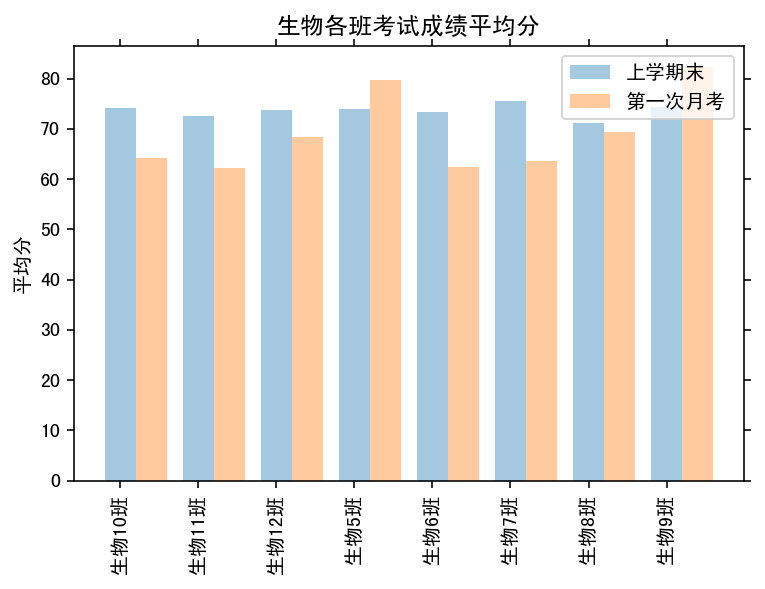

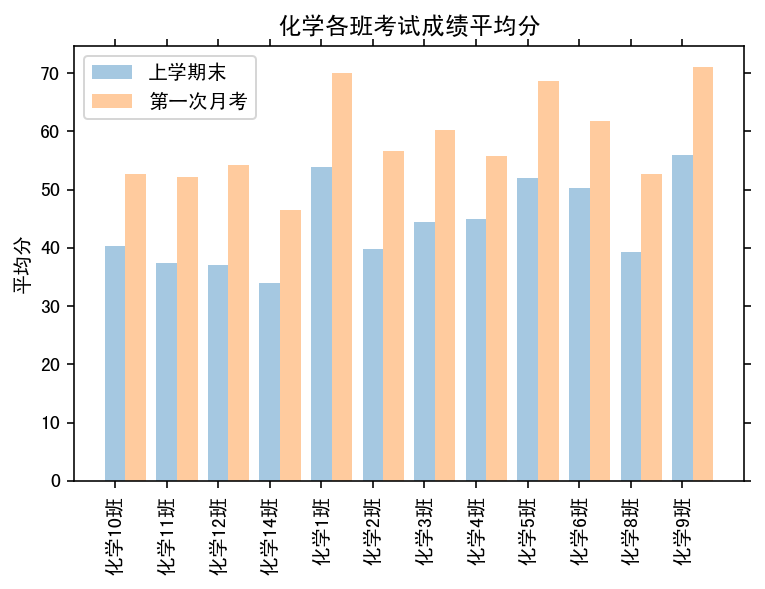

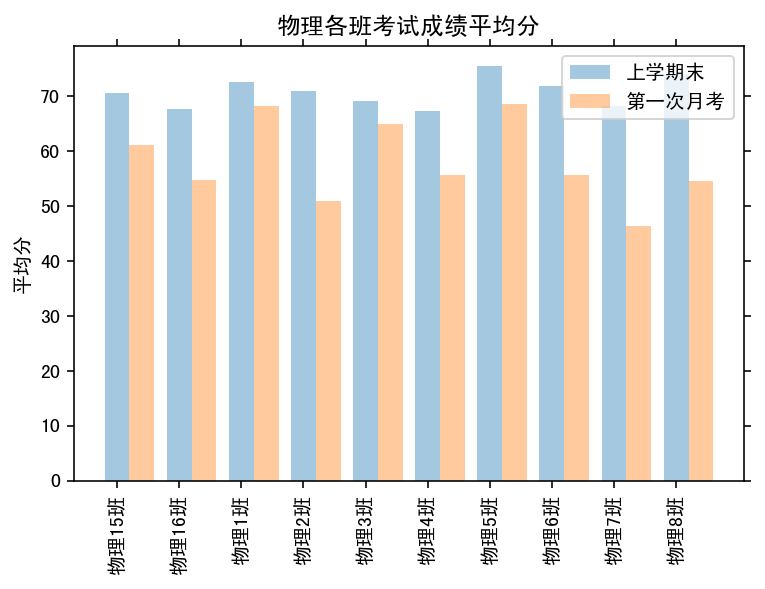

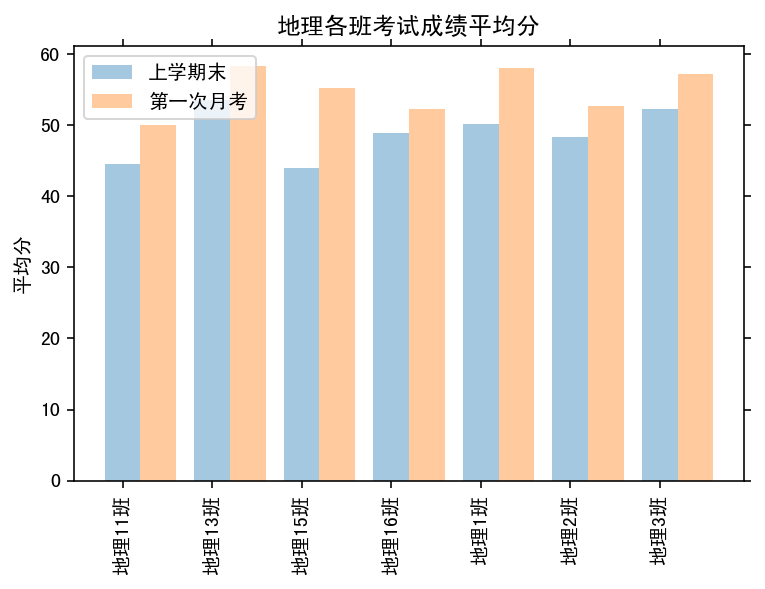

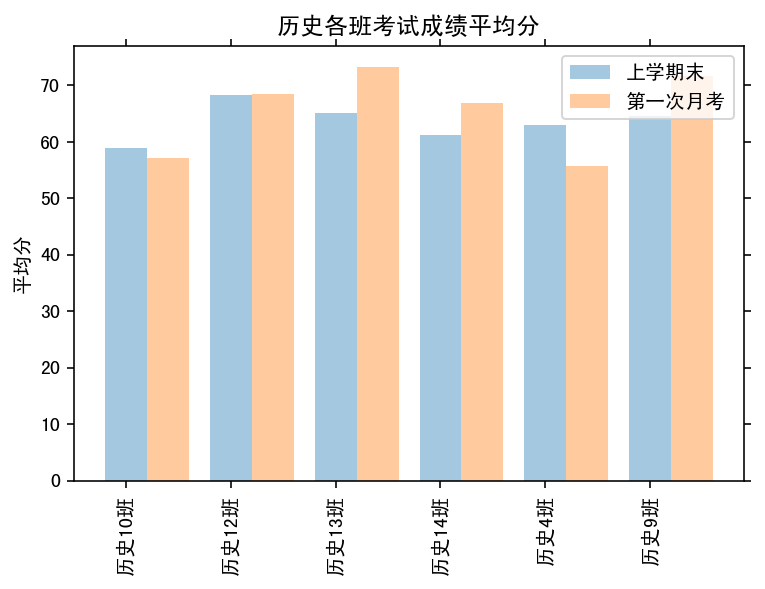

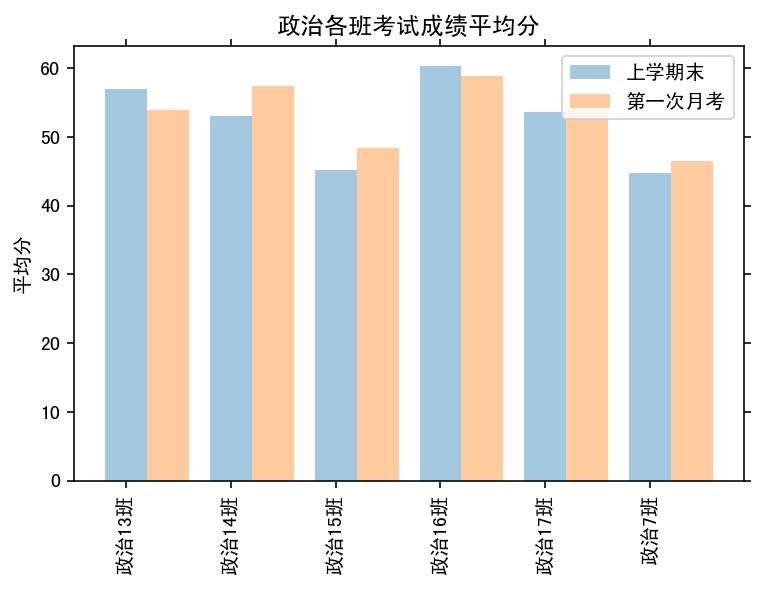

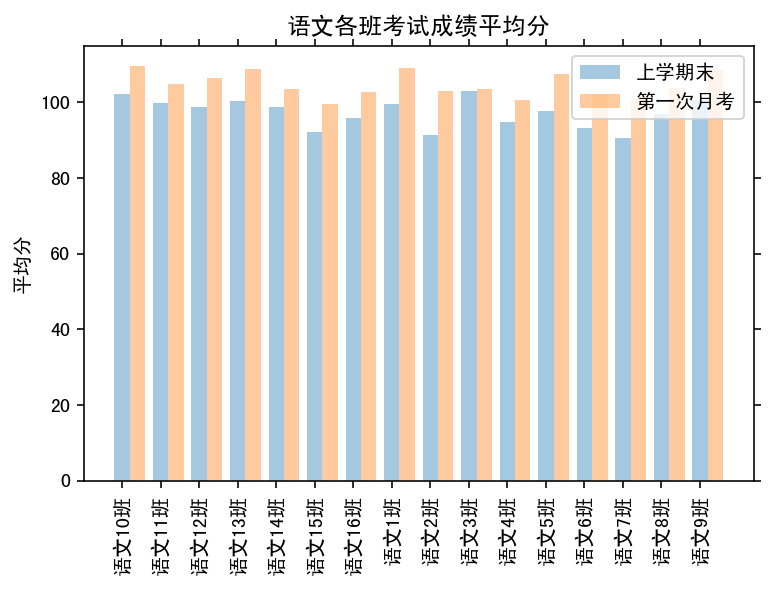

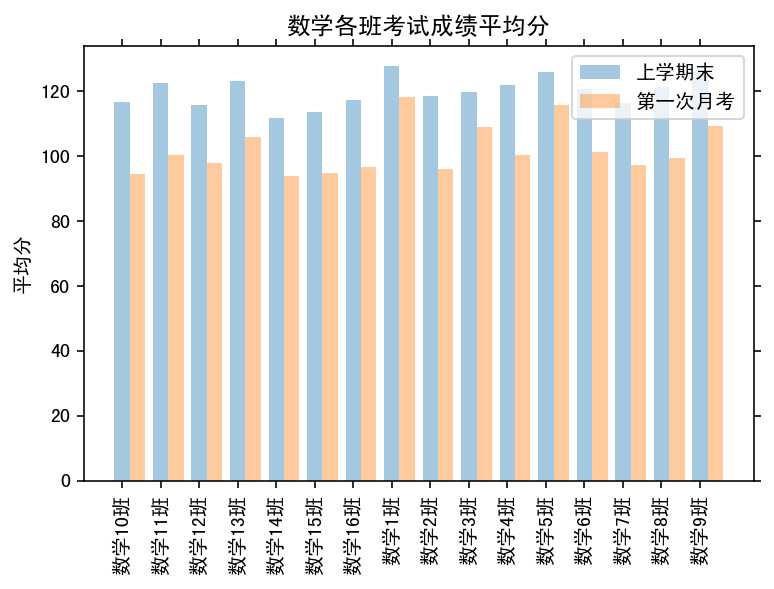

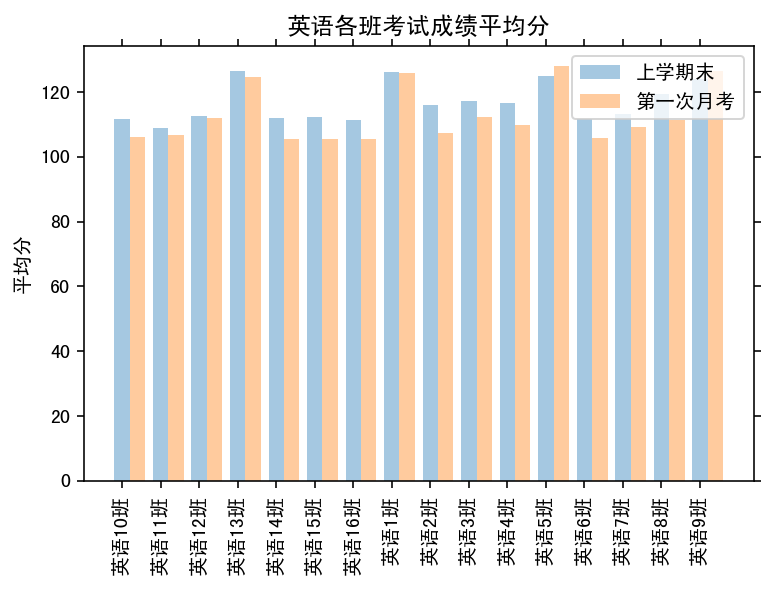

In [14]:
pltBar([banjiAve0,banjiAve1],times, title='平均分')

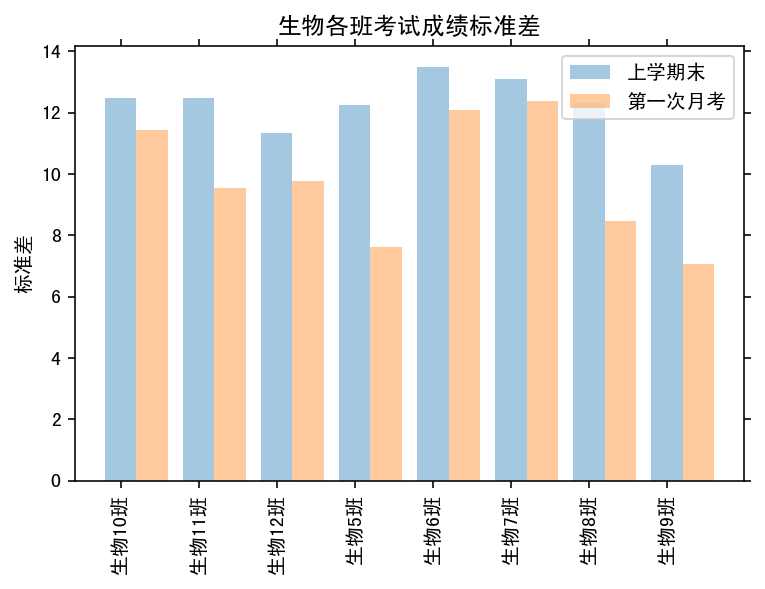

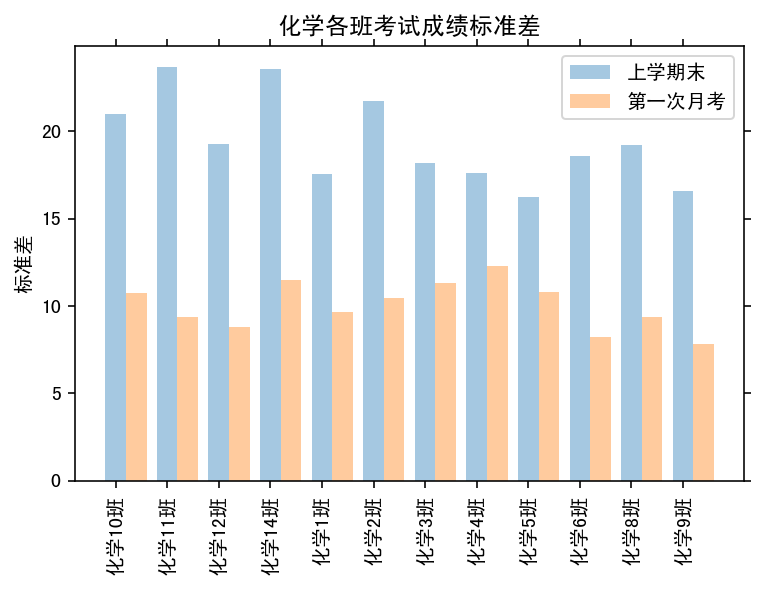

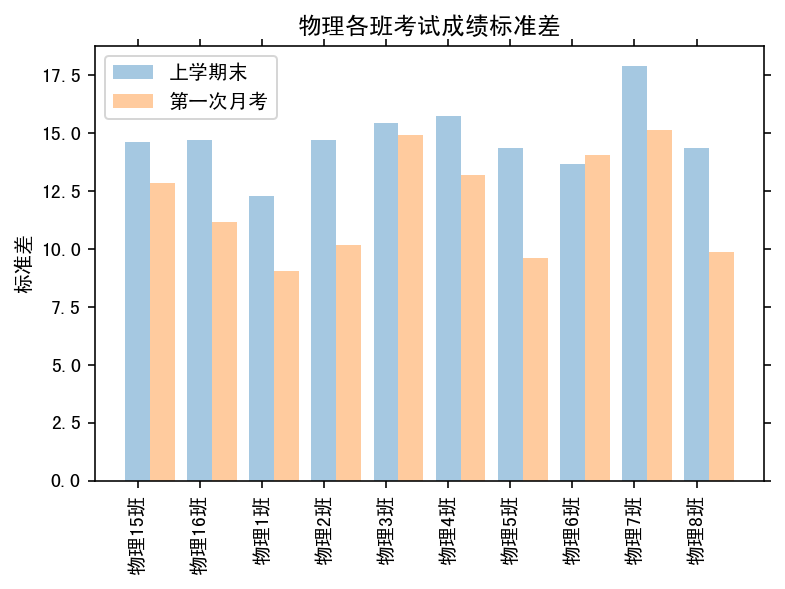

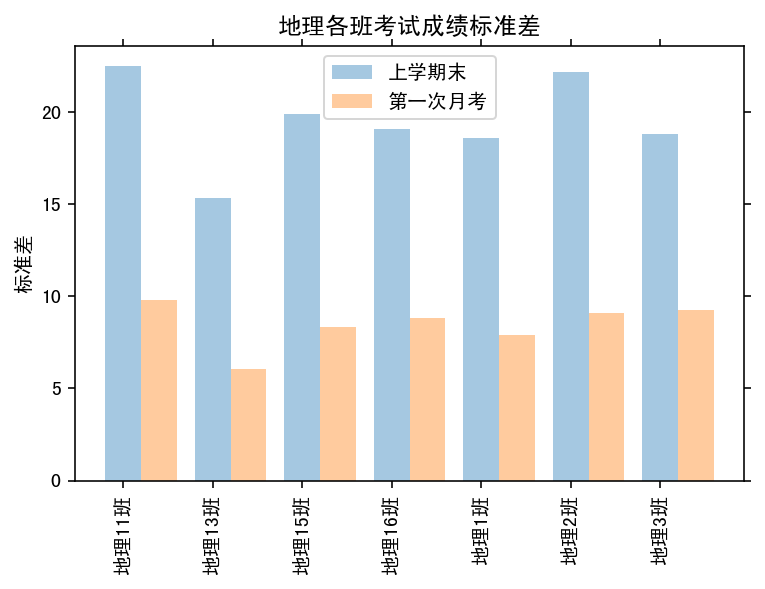

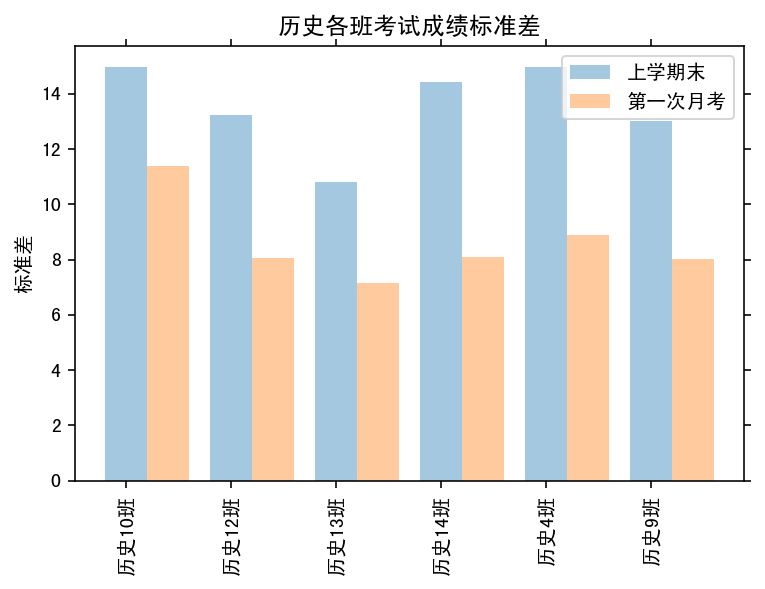

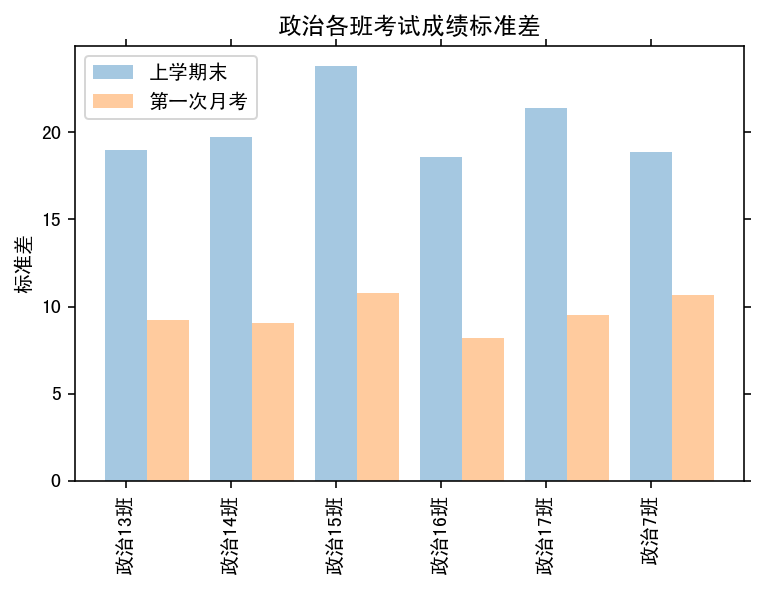

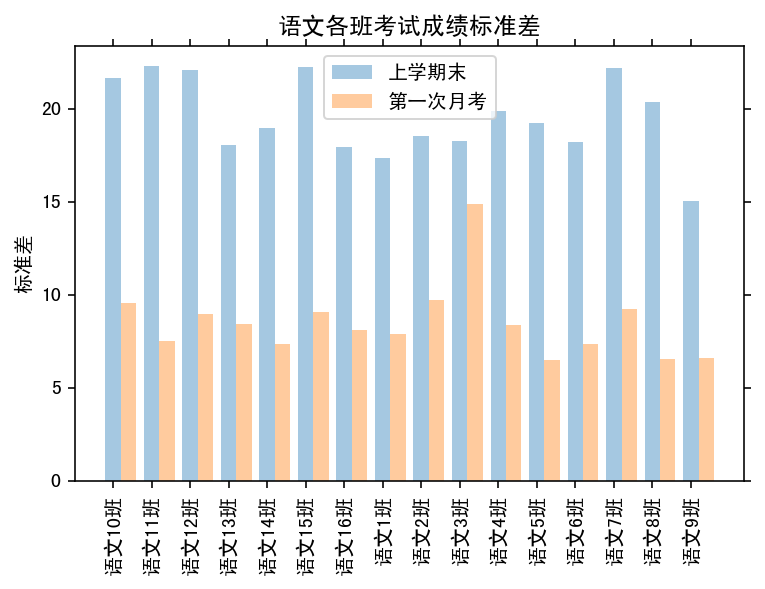

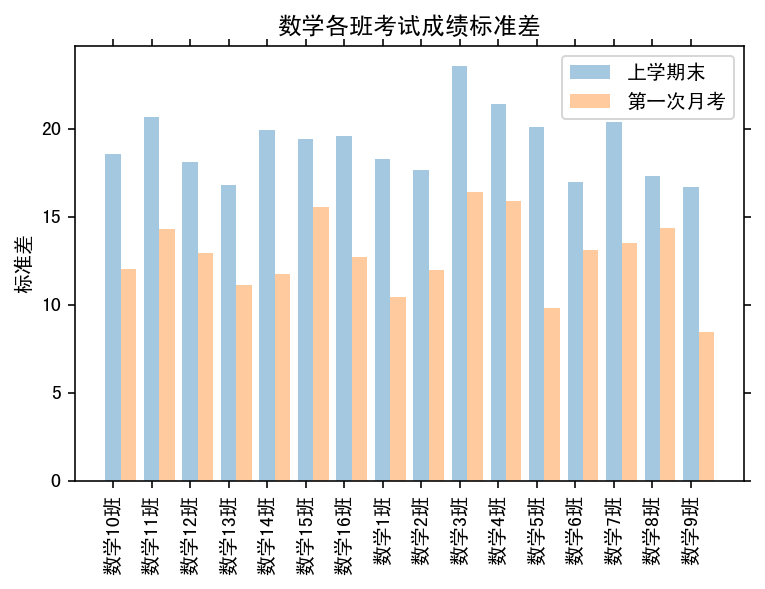

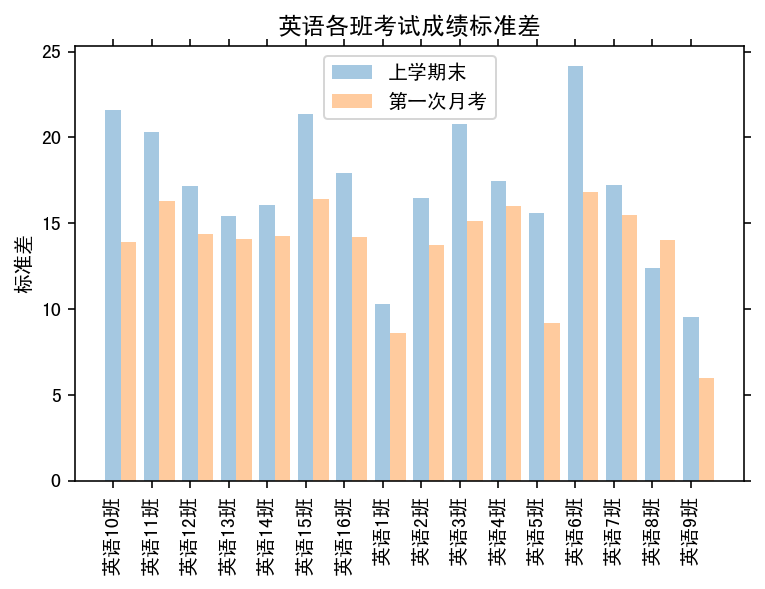

In [15]:
pltBar([banjiStd0,banjiStd1], times, '标准差')

得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


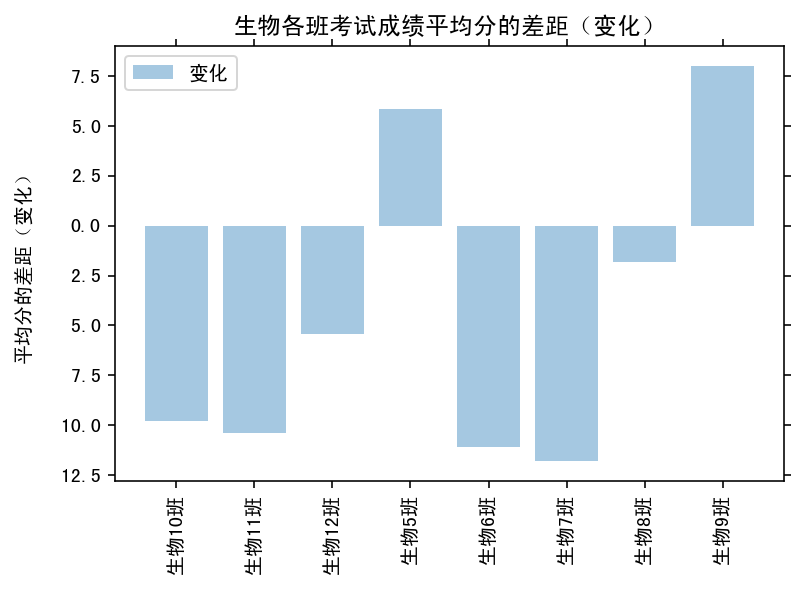

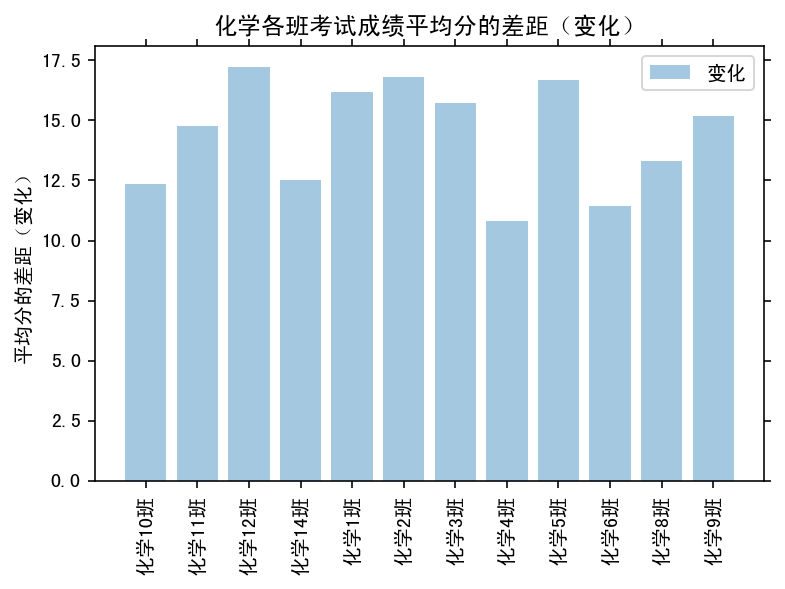

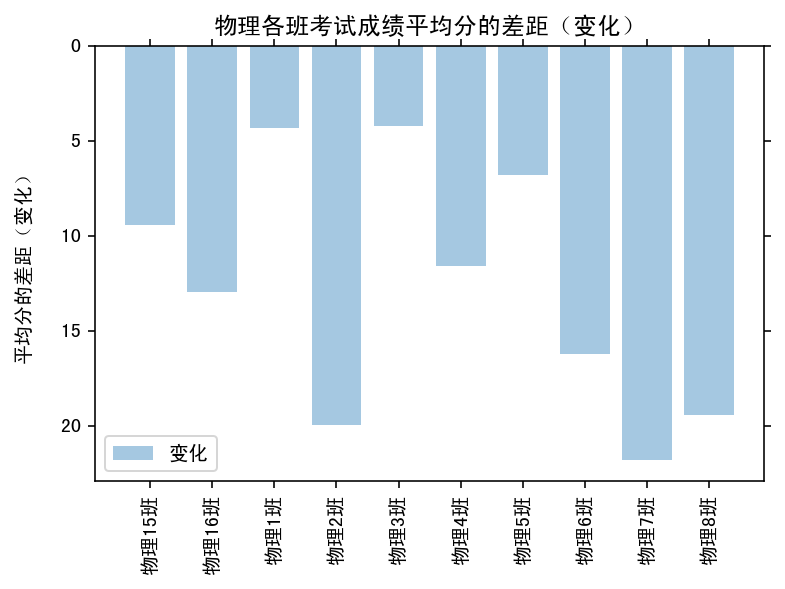

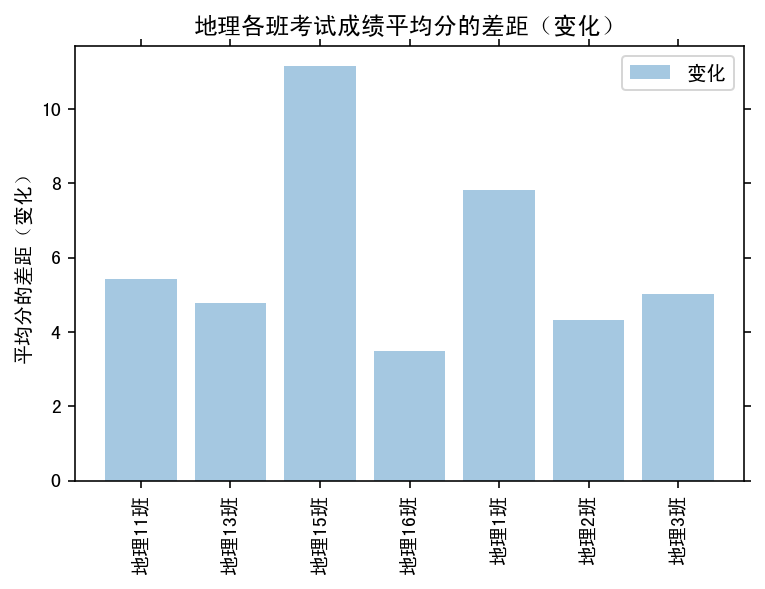

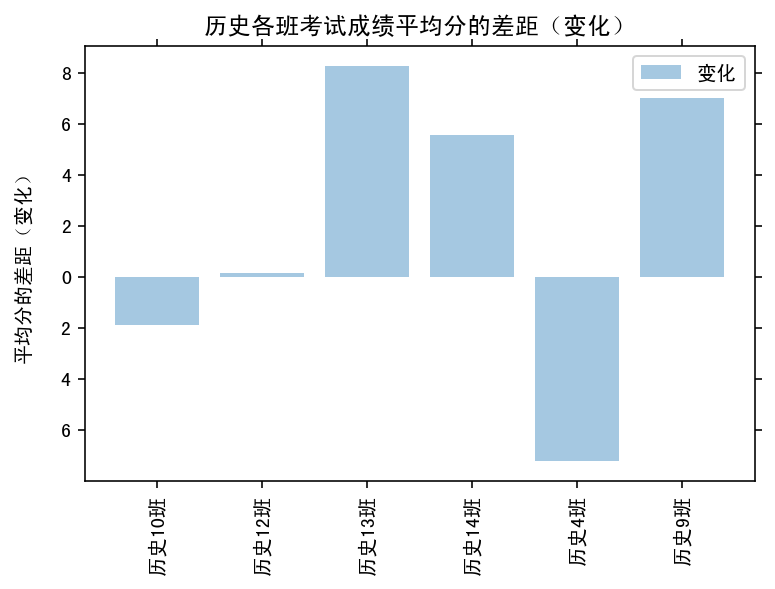

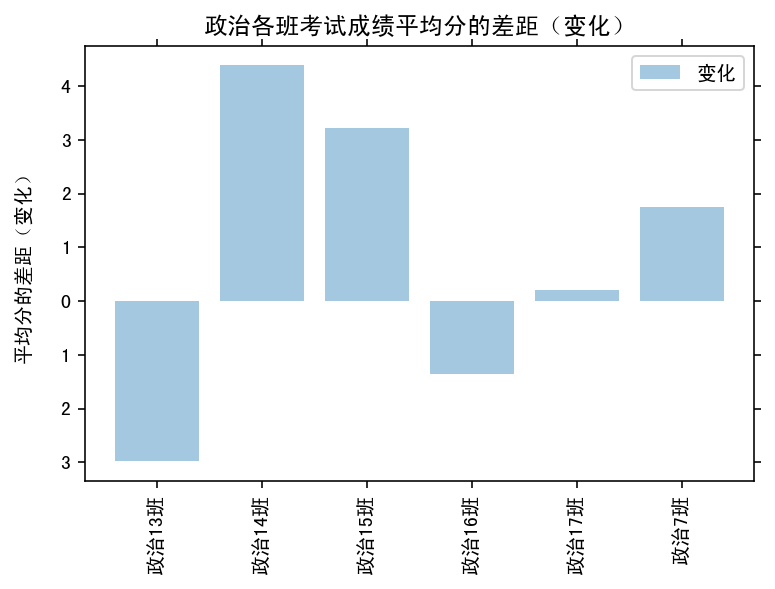

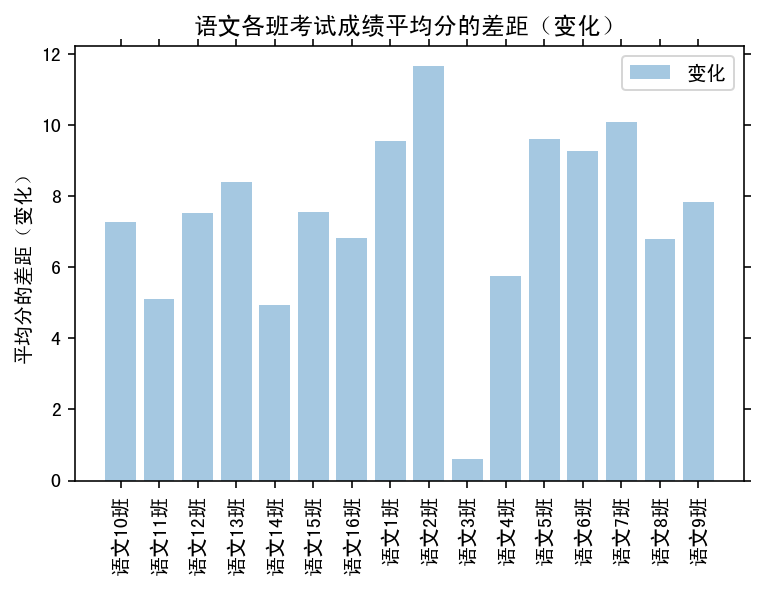

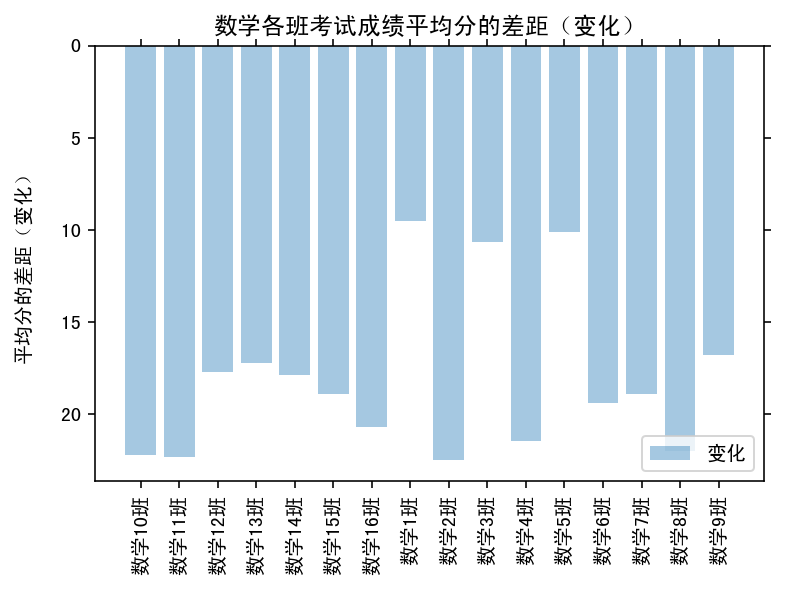

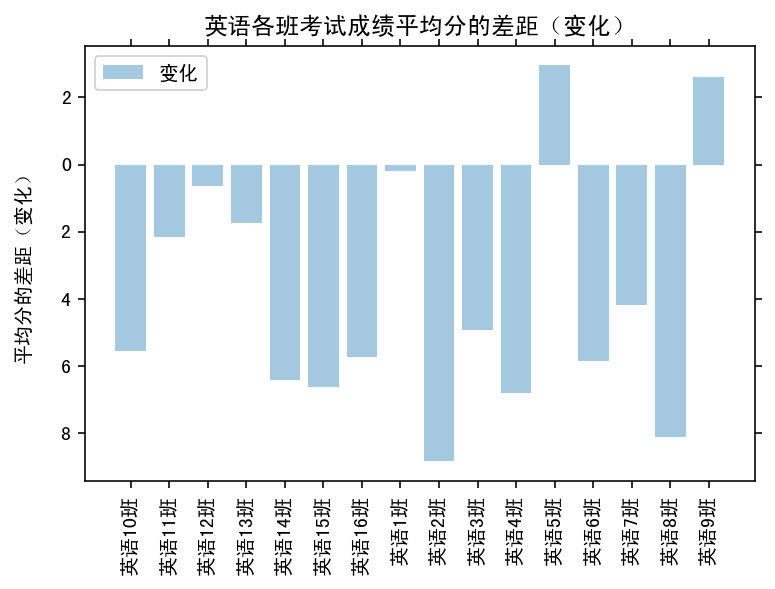

In [16]:
pltBar([banjiVary],['变化'], '平均分的差距（变化）')

## 第二次课
1. 分数标准化：消除不同试卷之间的难度，区分度的差距
2. 利用标准分进行比较
3. 每个科目，每个班两次考试之间的比较，画柱状图📊
4. 每个图像标准分变化，画柱状图


- 标准化公式：
![标准化公式](https://image.hansking.cn/uPic/202006/g9Rx1i.png)

In [17]:
# 标准化函数
def ZscoreStd(x):
    """Z-score normaliaztion"""
    x = (x - np.mean(x)) / np.std(x)
    return x

In [18]:
# 分数标准化
banjiZscoreStd0=[]
banjiZscoreStd1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreStd_=ZscoreStd(banjiAve0[index])
    banjiZscoreStd0.append(ZscoreStd_)
    
    ZscoreStd_=ZscoreStd(banjiAve1[index])
    banjiZscoreStd1.append(ZscoreStd_)

In [19]:
# banjiZscoreStd0

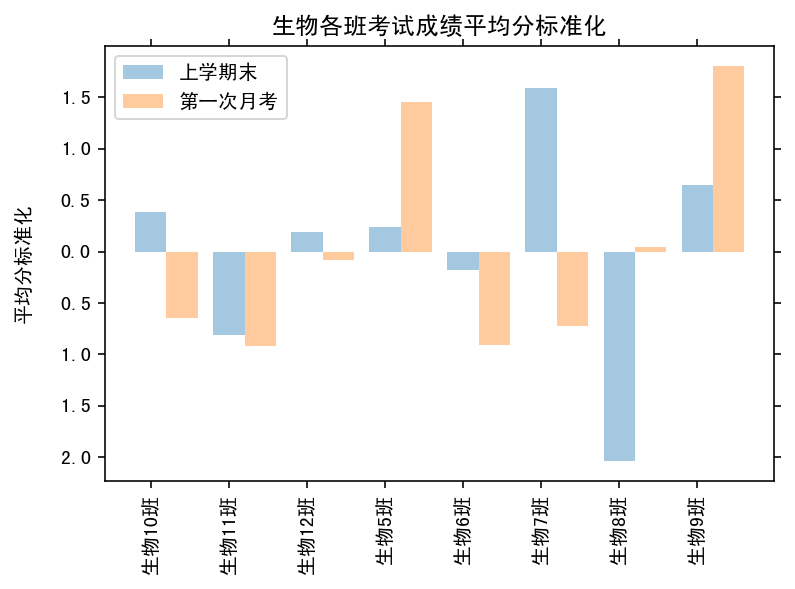

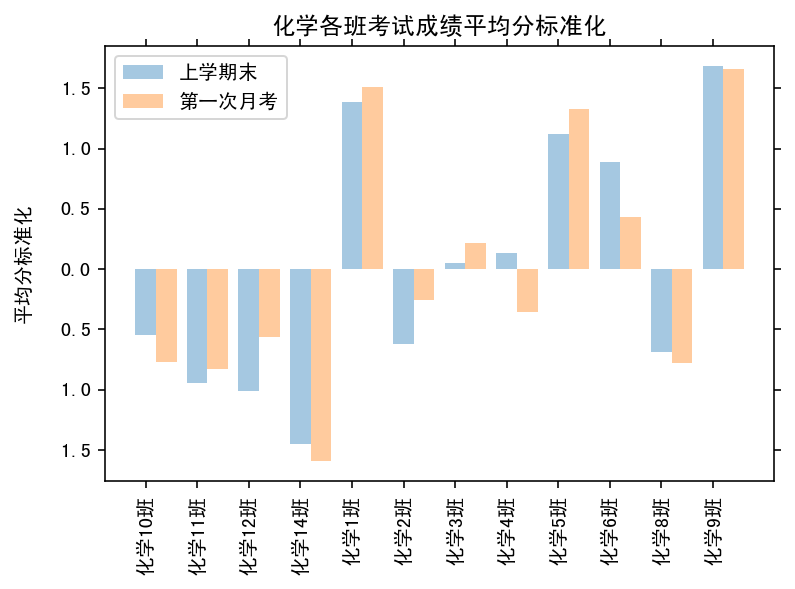

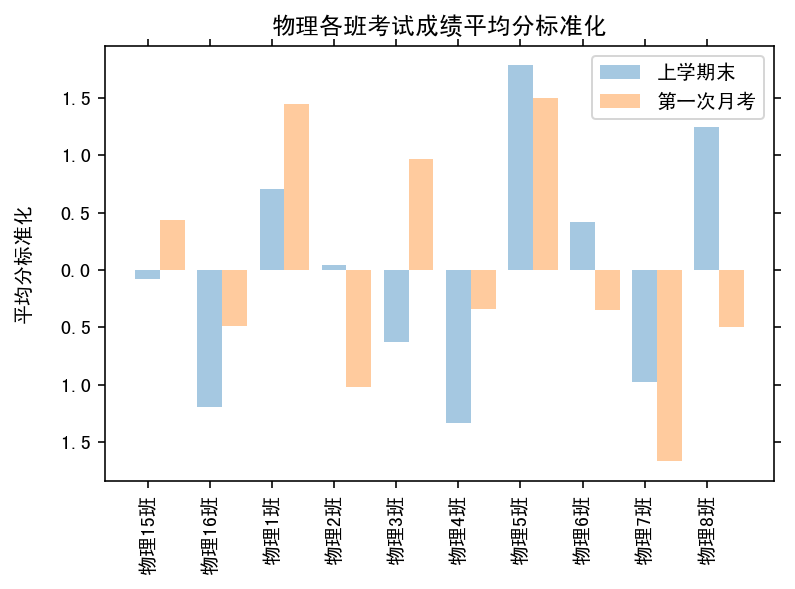

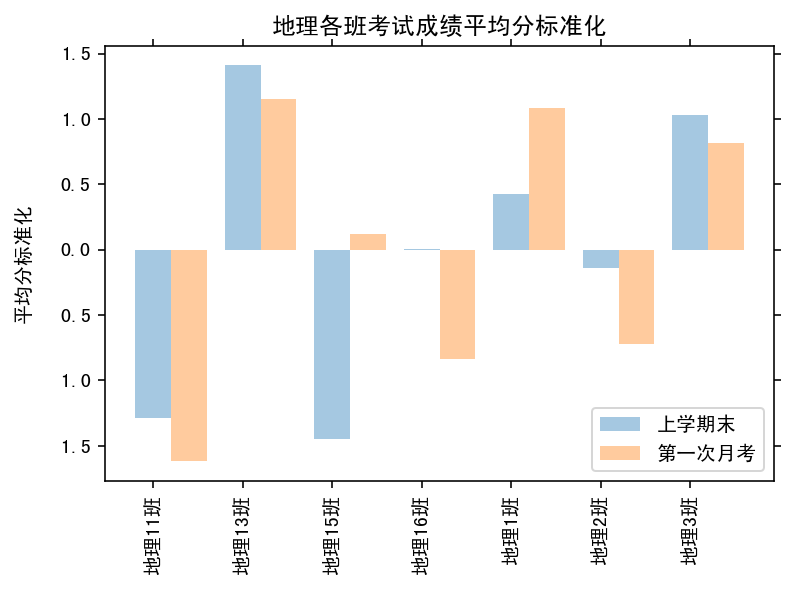

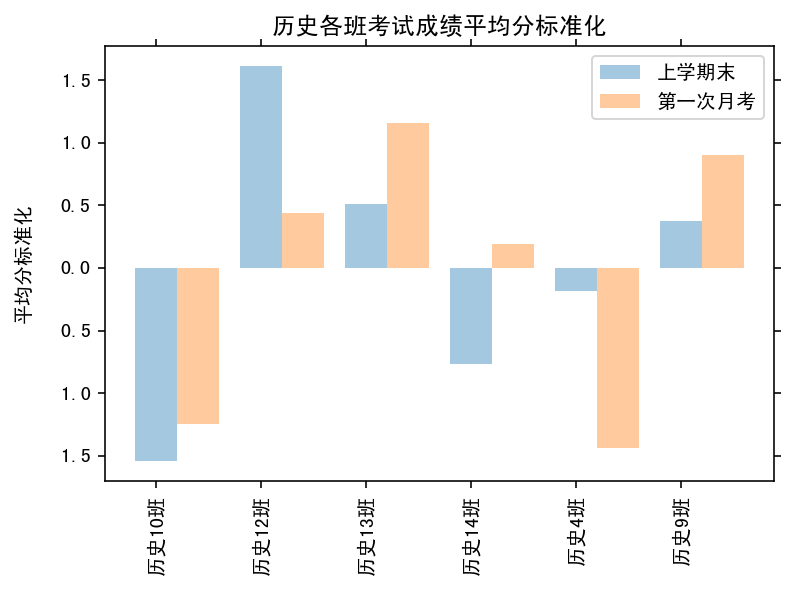

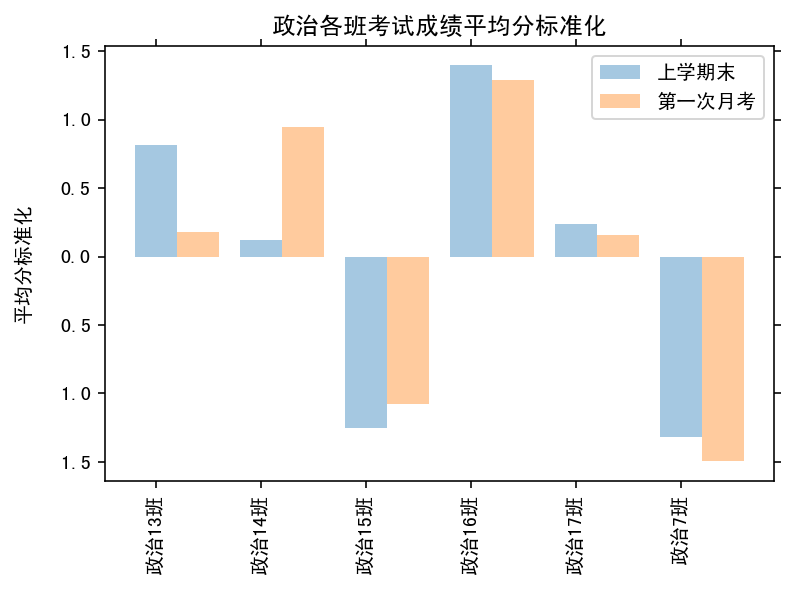

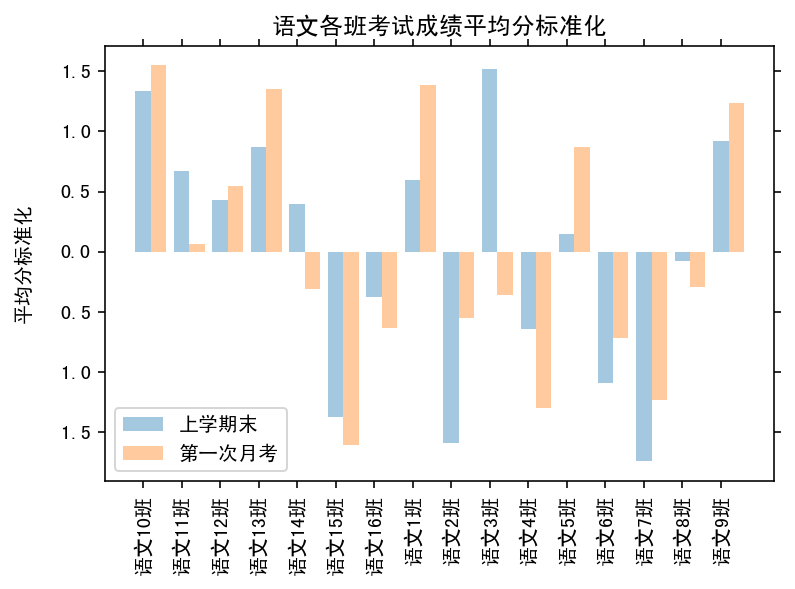

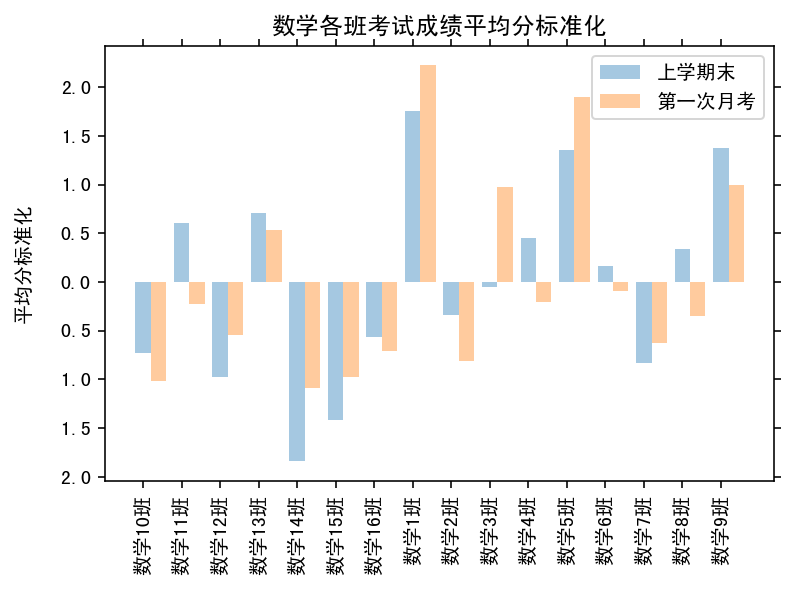

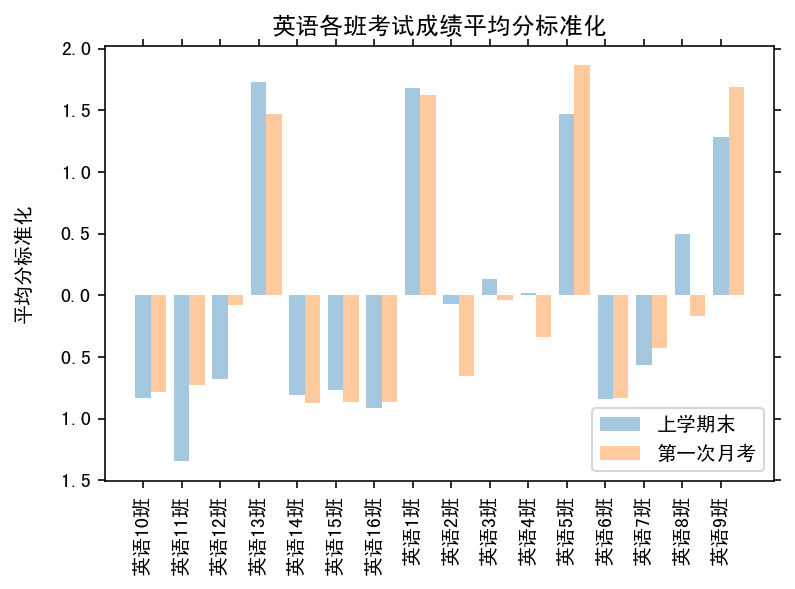

In [20]:
pltBar([banjiZscoreStd0,banjiZscoreStd1], times, title='平均分标准化')

## 第三次课

- 标准化后的数据在0附近不易分析


1. 进行规范化：把每个同学标准化之后的分数，转化为以75为平均值，5为标准差的分数
2. 比较规范化之后的变化，画出相应柱状图📊

In [21]:
def ZscoreNorm(x):
    """Z-score normaliaztion"""
    x = ((x - np.mean(x))*5 / np.std(x))+75
    return x

In [22]:
# 分数规范化
banjiZscoreNorm0=[]
banjiZscoreNorm1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreNorm_=ZscoreNorm(banjiAve0[index])
    banjiZscoreNorm0.append(ZscoreNorm_)

    ZscoreNorm_=ZscoreNorm(banjiAve1[index])
    banjiZscoreNorm1.append(ZscoreNorm_)

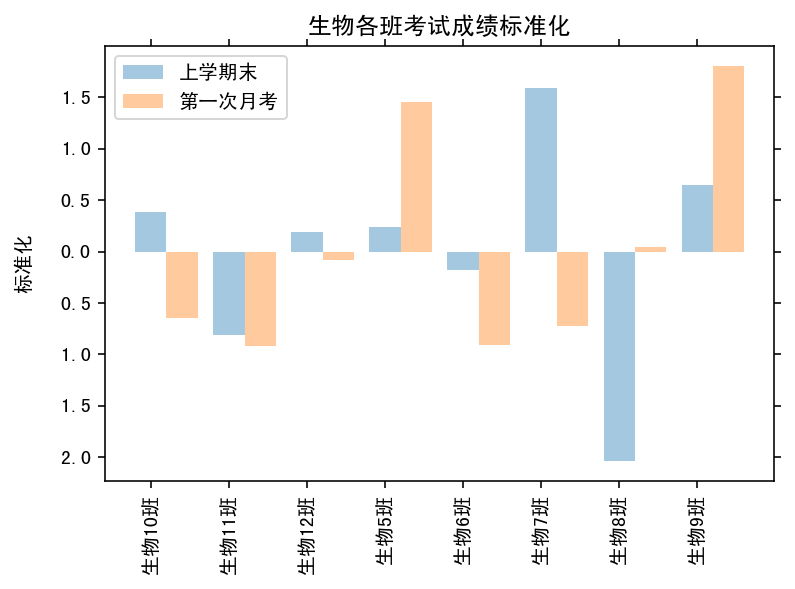

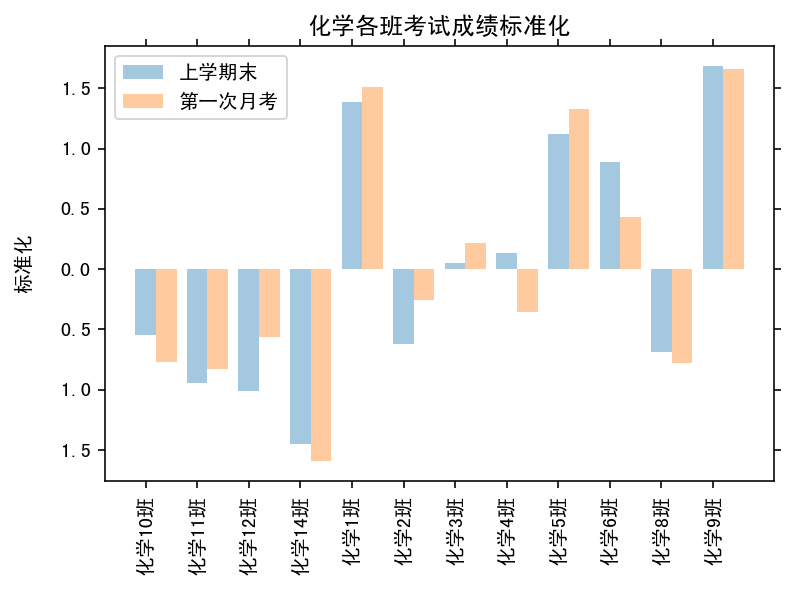

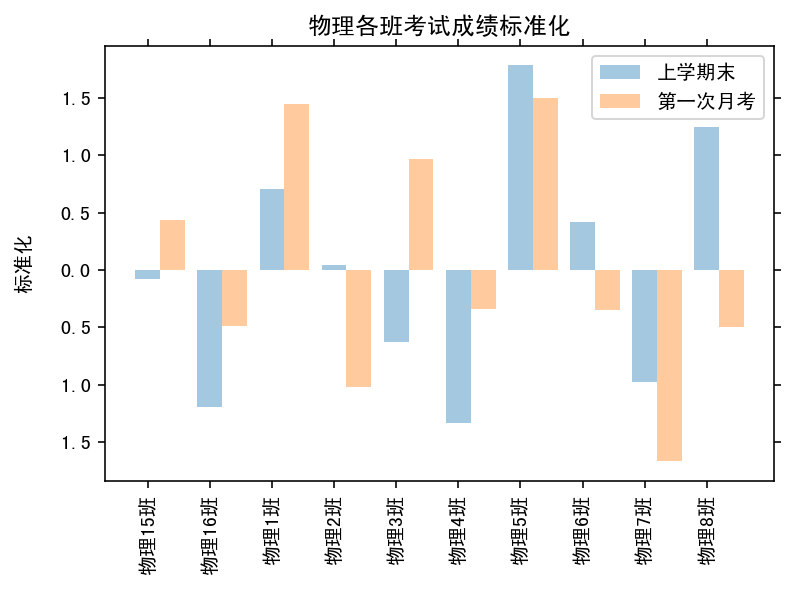

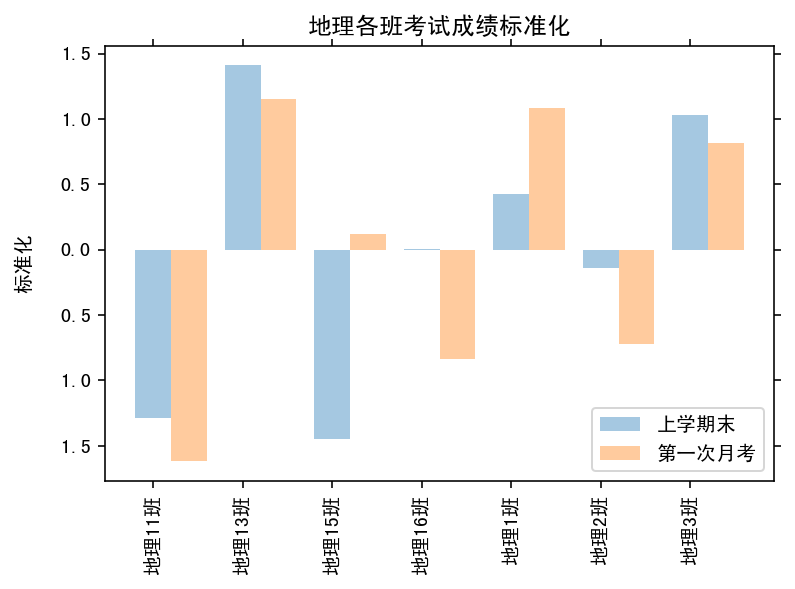

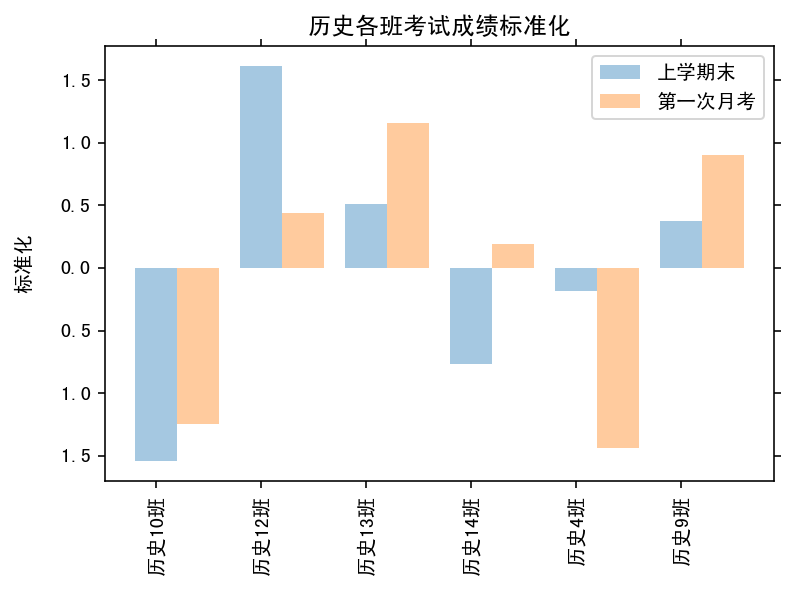

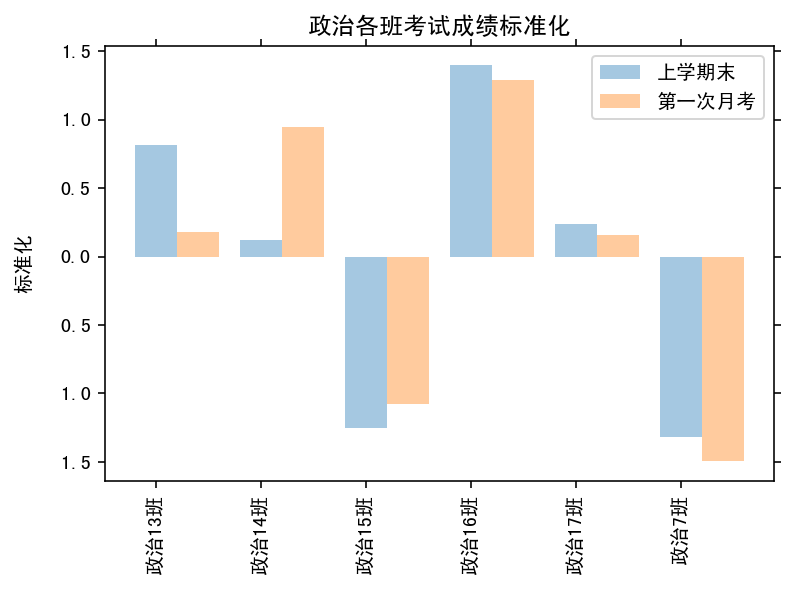

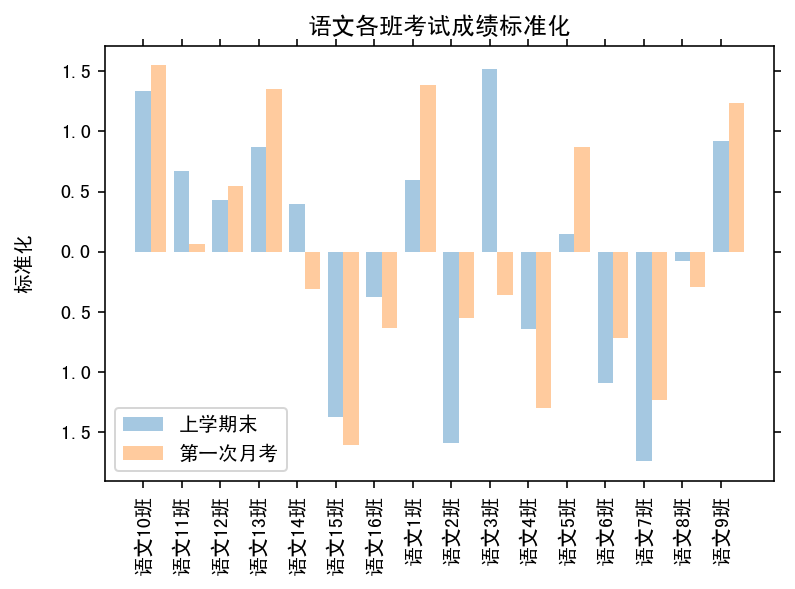

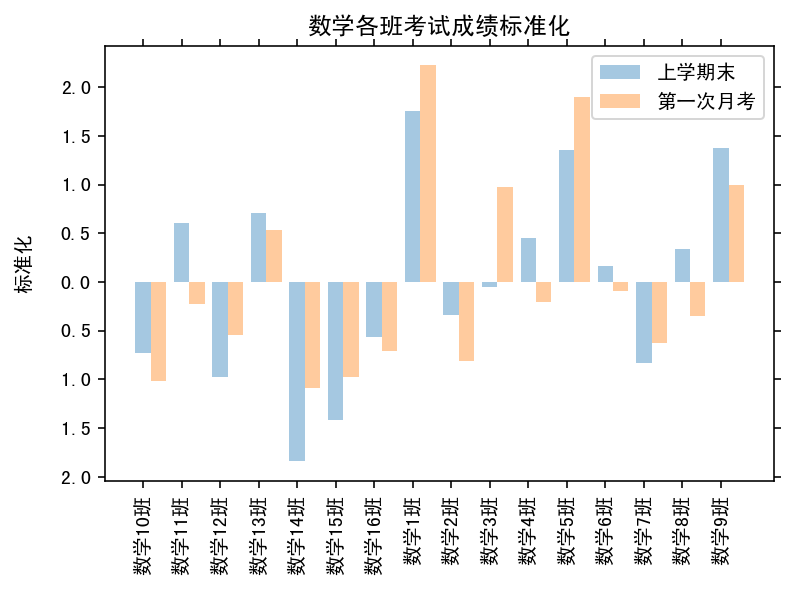

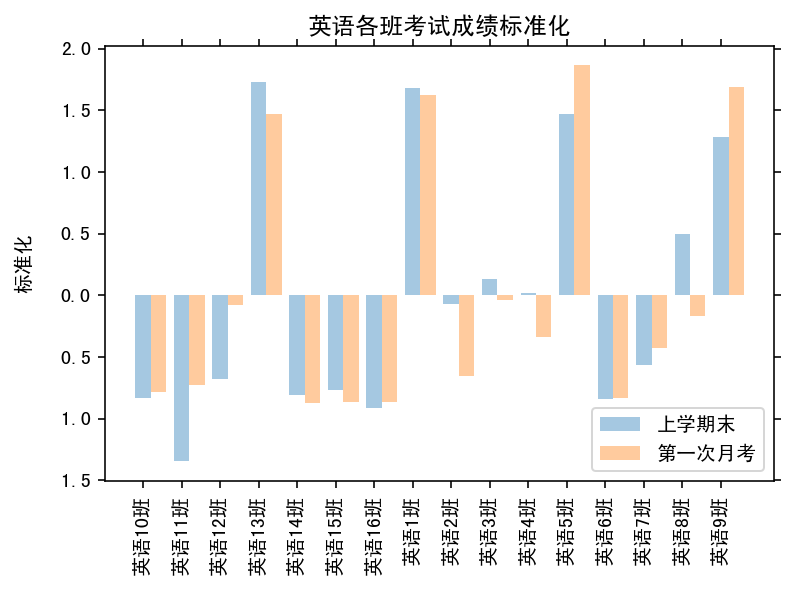

In [23]:
pltBar([banjiZscoreStd0, banjiZscoreStd1],times, title='标准化')

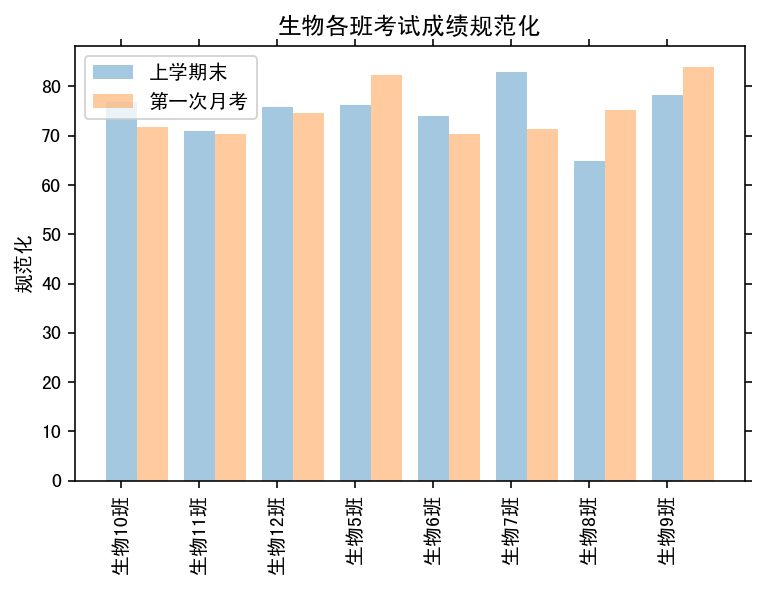

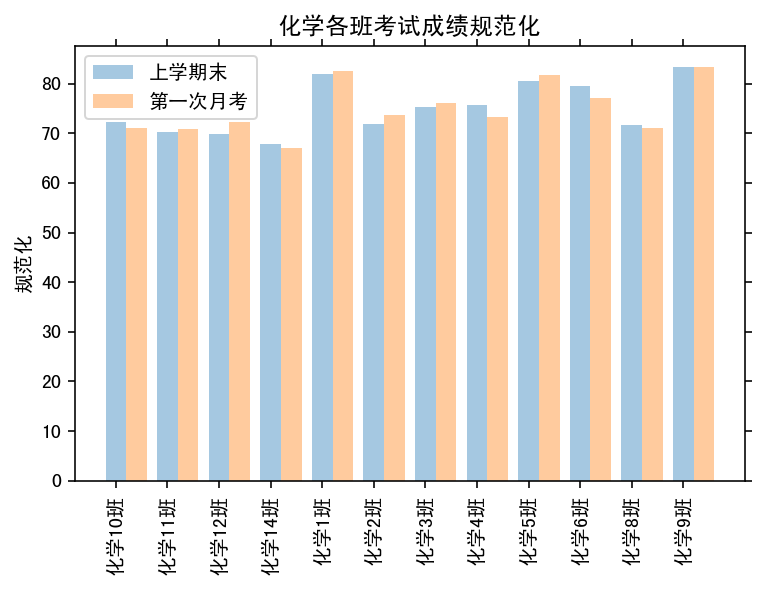

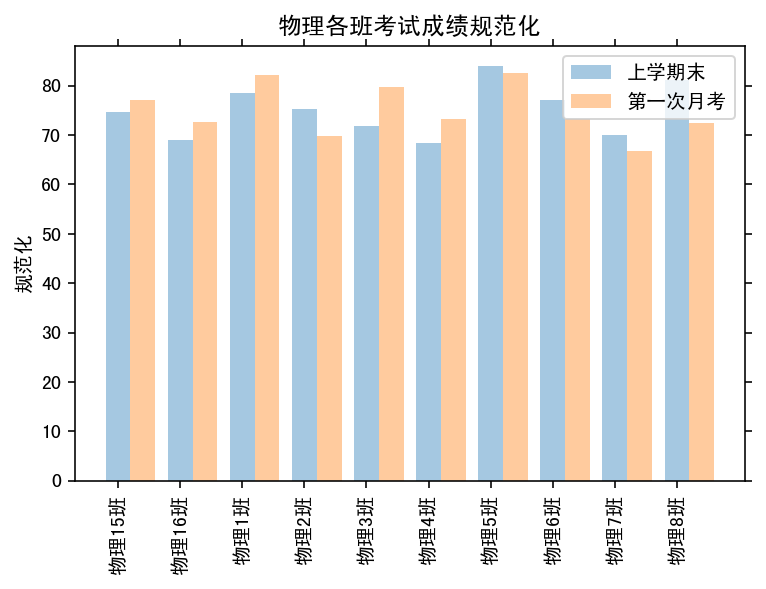

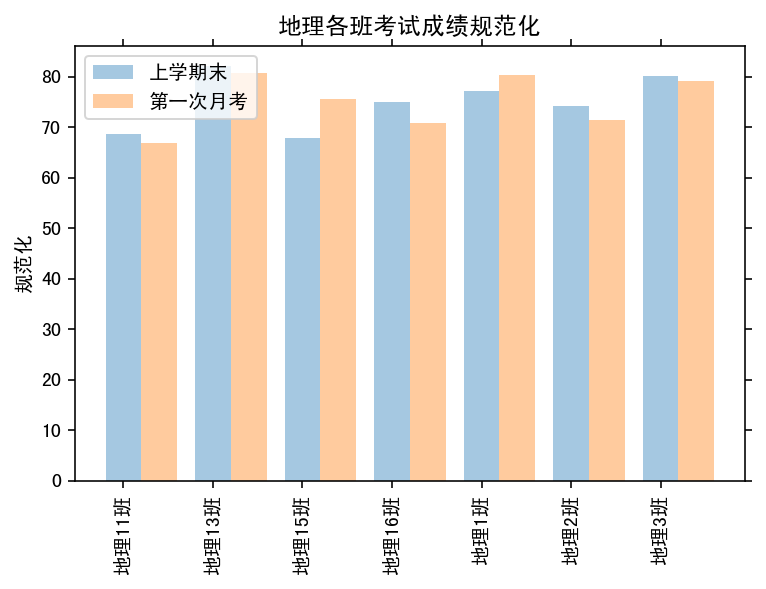

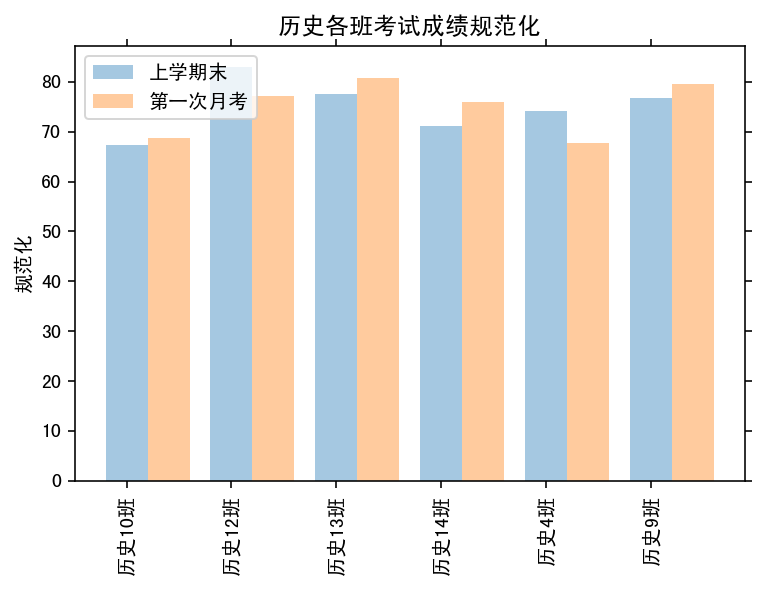

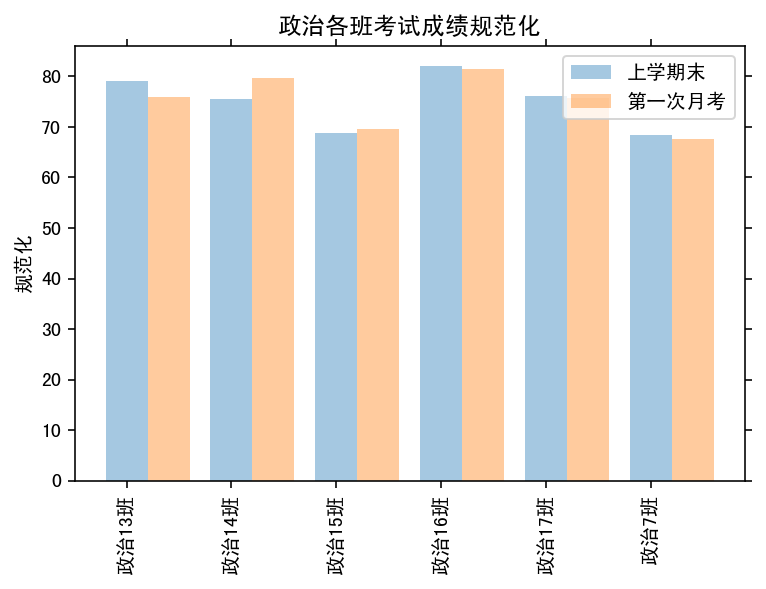

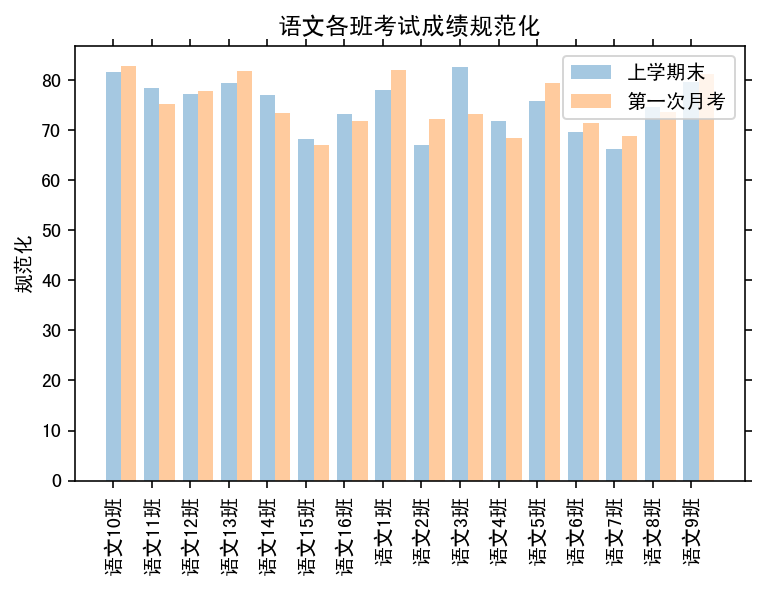

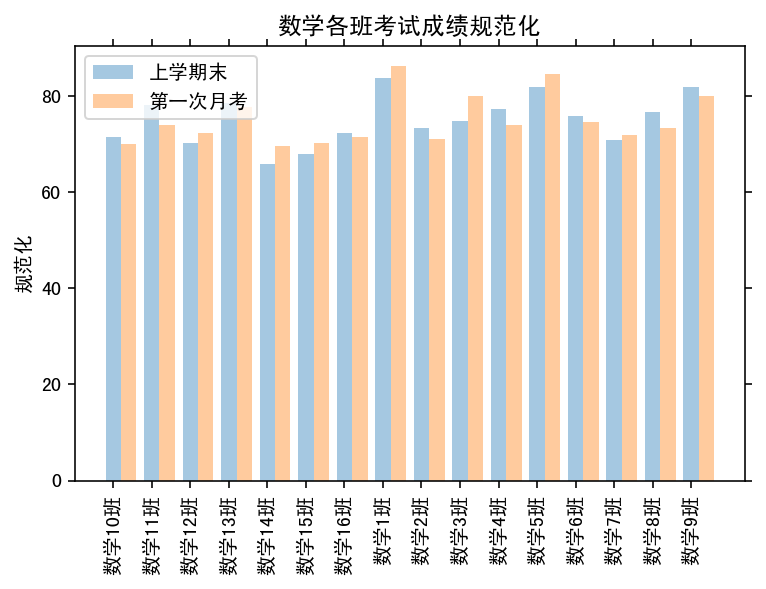

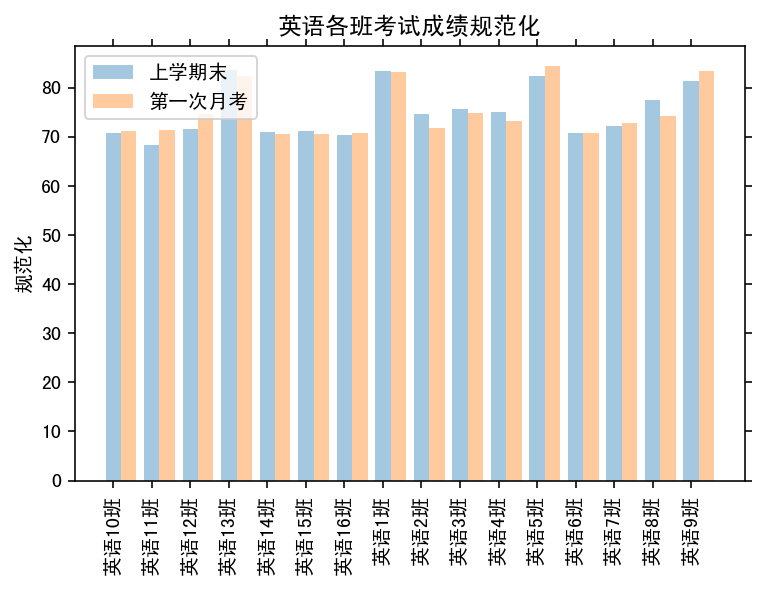

In [24]:
pltBar([banjiZscoreNorm0, banjiZscoreNorm1],times, title='规范化')

### 计算每一个行政班内所有学生、所有科目的有效标准分的均值

![u3KYsL](https://image.hansking.cn/uPic/202006/u3KYsL.png)

In [25]:
xzbGroups0=df0.groupby('语文班')
xzbGroups1=df1.groupby('语文班')

In [26]:
# 行政班科目标准化
xzbZscoreNorm0=[]
xzbZscoreNorm1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreNorm_=ZscoreNorm(xzbGroups0[subs[index]].mean())
    xzbZscoreNorm0.append(ZscoreNorm_)

    ZscoreNorm_=ZscoreNorm(xzbGroups1[subs[index]].mean())
    xzbZscoreNorm1.append(ZscoreNorm_)
# xzbZscoreNorm0
# xzbZscoreNorm1

In [27]:
# 清除该班级学生没有选此科目的影响
for n in range(N):
    for index,sub in enumerate(xzbZscoreNorm0[n]):
        if math.isnan(sub):
            xzbZscoreNorm0[n][index]=75
for n in range(N):
    for index,sub in enumerate(xzbZscoreNorm1[n]):
        if math.isnan(sub):
            xzbZscoreNorm1[n][index]=75

In [28]:
SUM=0
for i in range(N):
    SUM = SUM + xzbZscoreNorm0[i]
# 标准分均值
Y0ave=SUM/N

SUM=0
for i in range(N):
    SUM = SUM + xzbZscoreNorm1[i]
Y1ave=SUM/N

# 行政班科目 标准分
Y0bzf=[]
Y1bzf=[]

SUM=0
for i in range(N):
    SUM = SUM + (xzbZscoreNorm0[i] - Y0ave) ** 2
Y0std = (SUM / N) ** 0.5
for i in range(N):
    Y0bzf.append(((xzbZscoreNorm0[i] - Y0ave) * 5) / Y0std +75)

SUM=0
for i in range(N):
    SUM = SUM + (xzbZscoreNorm1[i] - Y1ave) ** 2
Y1std = (SUM / N) ** 0.5
for i in range(N):
    Y1bzf.append(((xzbZscoreNorm1[i] - Y0ave) * 5) / Y1std +75)

# 行政班科目 参考分
xzbCkf0=[]
xzbCkf1=[]
for index,sub in enumerate(types[1:1+N]):
    Ckf_ = (((banjiZscoreNorm0[index] - Y0ave.mean()) * 5) / Y1std.mean()) + 75
    xzbCkf0.append(Ckf_)

    Ckf_ = (((banjiZscoreNorm1[index] - Y0ave.mean()) * 5) / Y1std.mean()) + 75
    xzbCkf1.append(Ckf_)
    
xzbCkf0

[生物班
 生物10班    78.347240
 生物11班    67.885682
 生物12班    76.615627
 生物5班     77.063731
 生物6班     73.394031
 生物7班     88.837003
 生物8班     57.226076
 生物9班     80.630609
 Name: 生物, dtype: float64,
 化学班
 化学10班    70.236074
 化学11班    66.722861
 化学12班    66.175651
 化学14班    62.328080
 化学1班     87.085155
 化学2班     69.582356
 化学3班     75.427821
 化学4班     76.153293
 化学5班     84.768275
 化学6班     82.764222
 化学8班     69.012023
 化学9班     89.744190
 Name: 化学, dtype: float64,
 物理班
 物理15班    74.356617
 物理16班    64.581385
 物理1班     81.199656
 物理2班     75.356513
 物理3班     69.494050
 物理4班     63.343847
 物理5班     90.587163
 物理6班     78.692861
 物理7班     66.452876
 物理8班     85.935032
 Name: 物理, dtype: float64,
 地理班
 地理11班    63.764179
 地理13班    87.311076
 地理15班    62.371840
 地理16班    75.033201
 地理1班     78.740005
 地理2班     73.765188
 地理3班     84.014510
 Name: 地理, dtype: float64,
 历史班
 历史10班    61.545828
 历史12班    89.099344
 历史13班    79.438757
 历史14班    68.273625
 历史4班     73.407019
 历史9班     78.235427
 Name: 

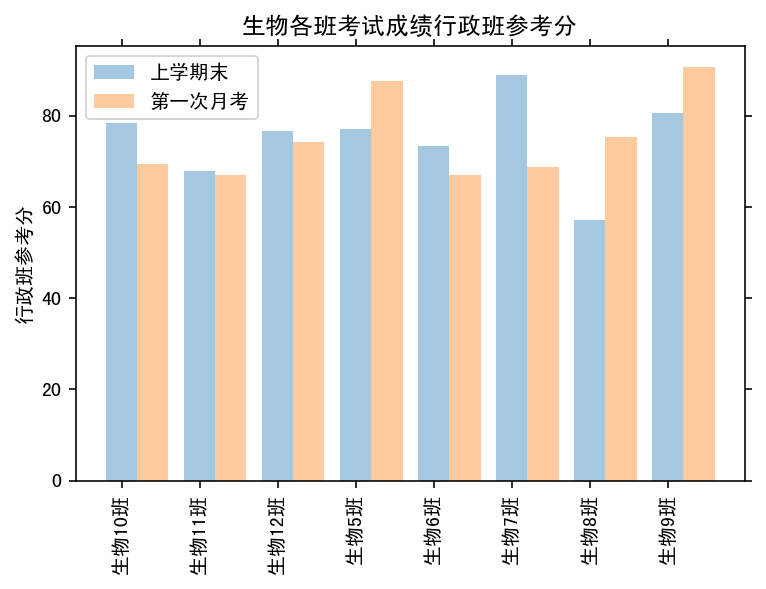

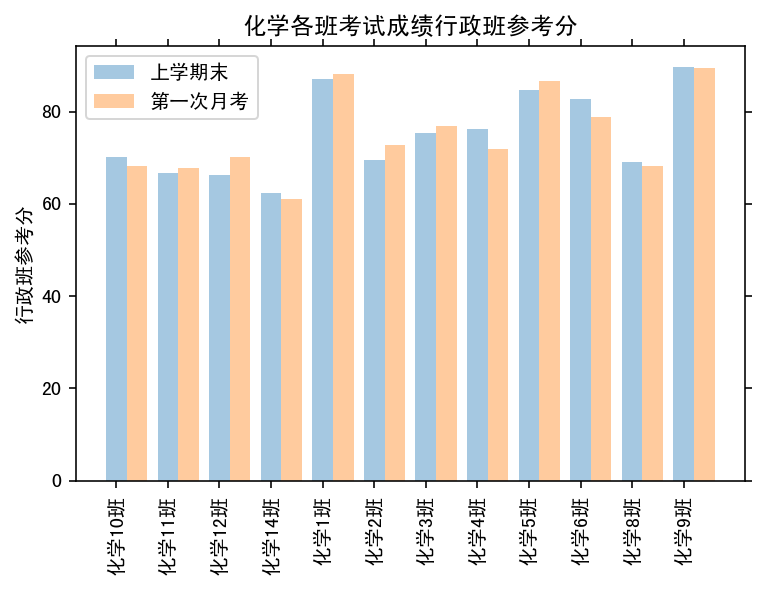

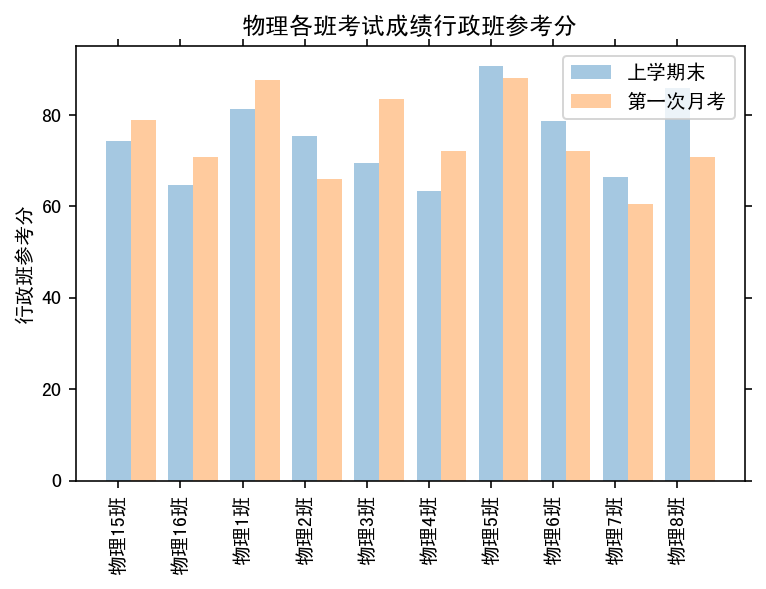

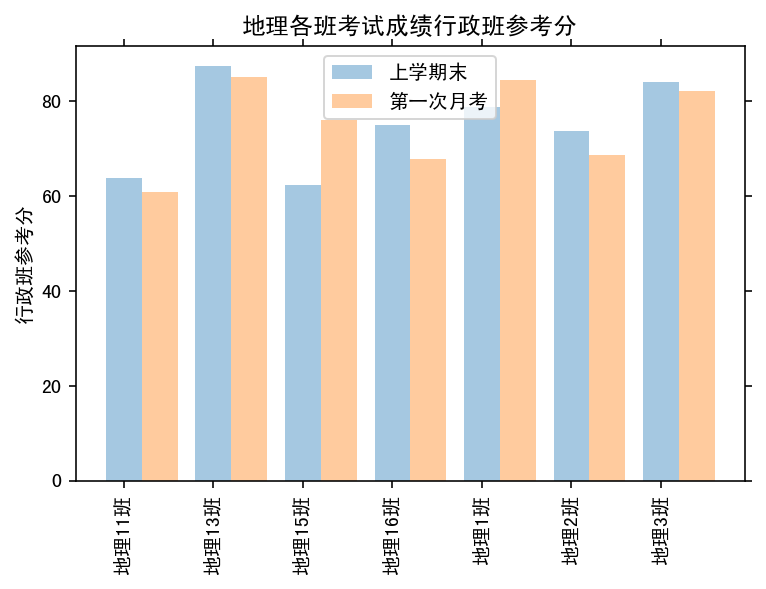

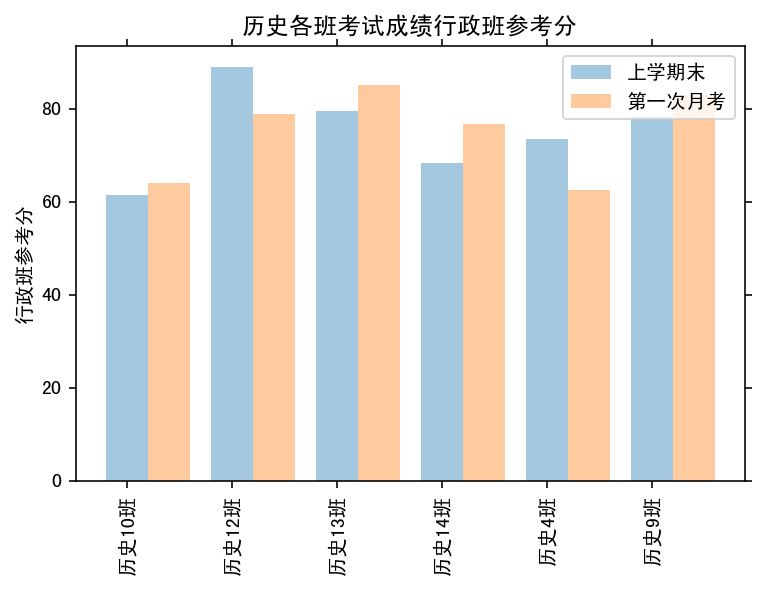

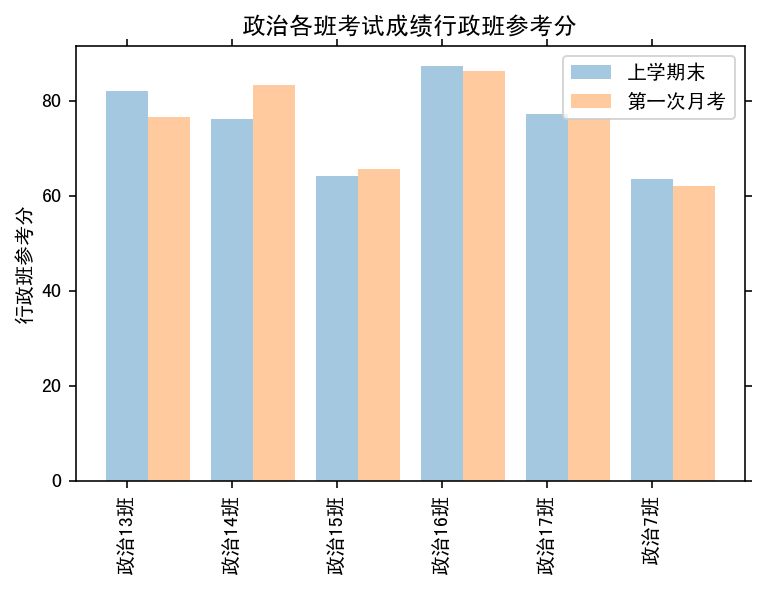

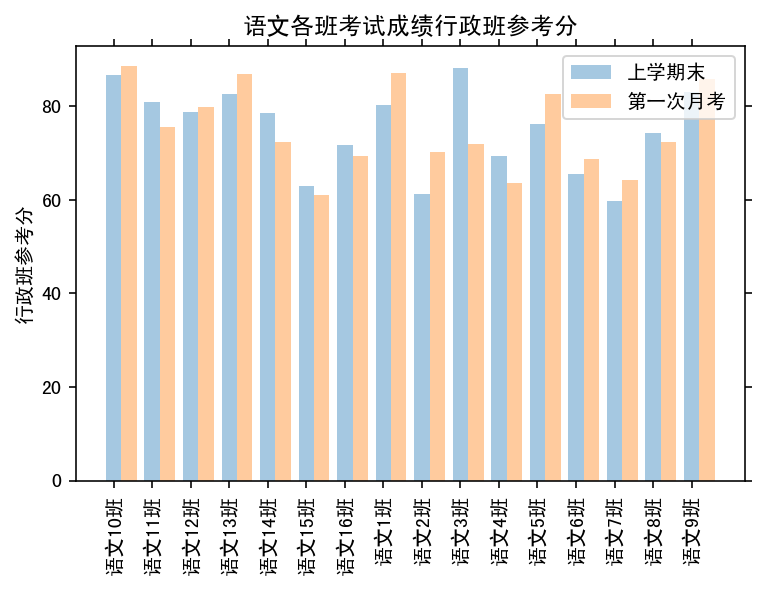

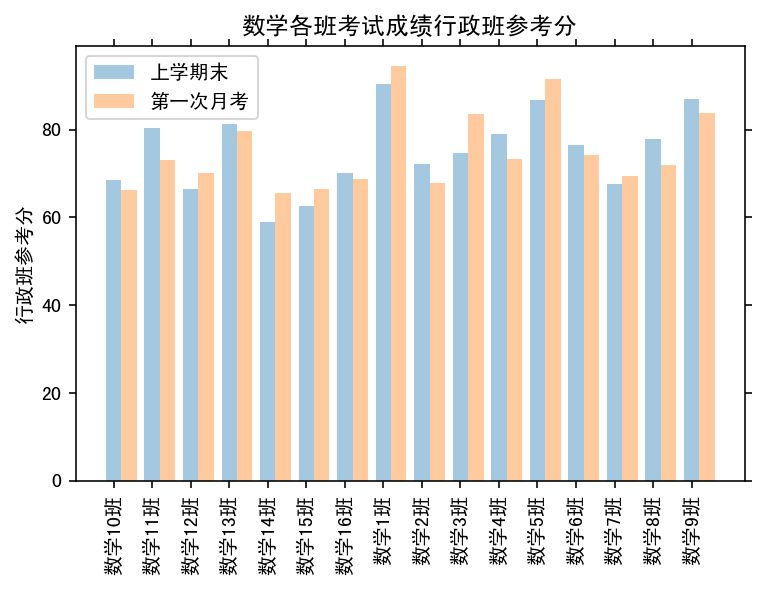

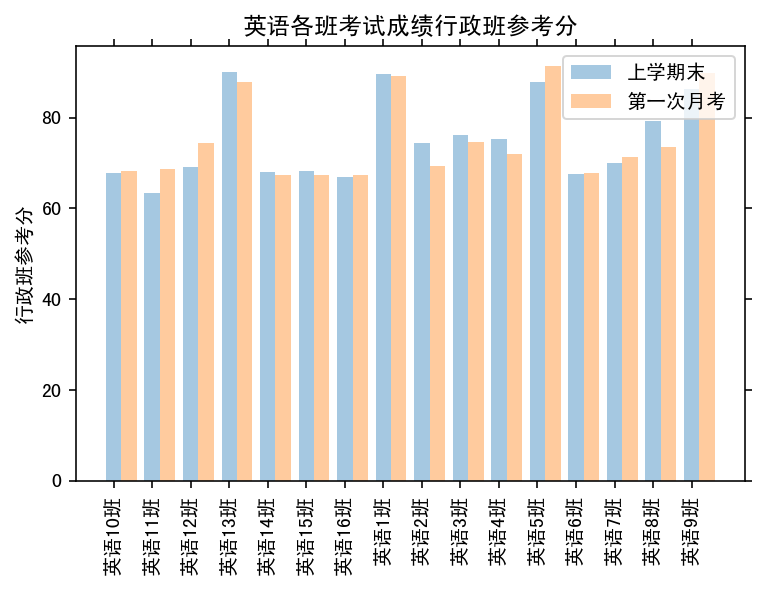

In [29]:
pltBar([xzbCkf0, xzbCkf1],times, title='行政班参考分')

### 综合比较

In [35]:
df2 = pd.read_excel(io=IO,sheet_name=sheets[2])
df2

,班级,任课教师
0,地理11班,地理教师3
1,地理13班,地理教师4
2,地理15班,地理教师2
3,地理16班,地理教师3
4,地理1班,地理教师2
...,...,...
92,政治14班,政治教师1
93,政治15班,政治教师3
94,政治16班,政治教师1
95,政治17班,政治教师2


In [44]:
df2.groupby('任课教师')['班级'].count()

任课教师
化学教师1    2
化学教师2    2
化学教师3    2
化学教师4    2
化学教师5    2
化学教师6    2
历史教师1    2
历史教师2    2
历史教师3    2
地理教师1    2
地理教师2    2
地理教师3    2
地理教师4    1
政治教师1    2
政治教师2    2
政治教师3    2
数学教师1    2
数学教师2    2
数学教师3    2
数学教师4    2
数学教师5    2
数学教师6    2
数学教师7    2
数学教师8    2
物理教师1    2
物理教师2    2
物理教师3    2
物理教师4    2
物理教师5    2
生物教师1    2
生物教师2    2
生物教师3    2
生物教师4    2
英语教师1    2
英语教师2    2
英语教师3    2
英语教师4    2
英语教师5    2
英语教师6    2
英语教师7    2
英语教师8    2
语文教师1    2
语文教师2    2
语文教师3    2
语文教师4    2
语文教师5    2
语文教师6    2
语文教师7    2
语文教师8    2
Name: 班级, dtype: int64

,班级,任课教师
0,地理11班,地理教师3
1,地理13班,地理教师4
2,地理15班,地理教师2
3,地理16班,地理教师3
4,地理1班,地理教师2
...,...,...
92,政治14班,政治教师1
93,政治15班,政治教师3
94,政治16班,政治教师1
95,政治17班,政治教师2
